In [2]:
import numpy as np
import operator 
from operator import itemgetter
import pandas as pd

In [5]:
def euc_dist(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

In [7]:
class KNN:
    def __init__(self, K=3):
        self.K = K
    def fit(self, x_train, y_train):
        self.X_train = x_train
        self.Y_train = y_train
    def predict(self, X_test):
        predictions = [] 
        for i in range(len(X_test)):
            dist = np.array([euc_dist(X_test[i], x_t) for x_t in   
            self.X_train])
            dist_sorted = dist.argsort()[:self.K]
            neigh_count = {}
            for idx in dist_sorted:
                if self.Y_train[idx] in neigh_count:
                    neigh_count[self.Y_train[idx]] += 1
                else:
                    neigh_count[self.Y_train[idx]] = 1
            sorted_neigh_count = sorted(neigh_count.items(),    
            key=operator.itemgetter(1), reverse=True)
            predictions.append(sorted_neigh_count[0][0]) 
        return predictions    

In [12]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
mnist = load_digits()
print(mnist.data.shape)

X = mnist.data 
y = mnist.target

(1797, 64)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(np.unique(y_train,return_counts=True))
print(np.unique(y_test,return_counts=True))

(1347, 64) (1347,)
(450, 64) (450,)
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([127, 140, 136, 143, 129, 134, 133, 138, 129, 138]))
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([51, 42, 41, 40, 52, 48, 48, 41, 45, 42]))


In [14]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score

In [15]:
kVals = np.arange(3,100,2)
accuracies = []
for k in kVals:
  model = KNN(K = k)
  model.fit(X_train, y_train)
  pred = model.predict(X_test)
  acc = accuracy_score(y_test, pred)
  accuracies.append(acc)
  print("K = "+str(k)+"; Accuracy: "+str(acc))

K = 3; Accuracy: 0.9755555555555555
K = 5; Accuracy: 0.9755555555555555
K = 7; Accuracy: 0.9755555555555555
K = 9; Accuracy: 0.9755555555555555
K = 11; Accuracy: 0.9733333333333334
K = 13; Accuracy: 0.9711111111111111
K = 15; Accuracy: 0.9688888888888889
K = 17; Accuracy: 0.9666666666666667
K = 19; Accuracy: 0.9666666666666667
K = 21; Accuracy: 0.9666666666666667
K = 23; Accuracy: 0.9644444444444444
K = 25; Accuracy: 0.9644444444444444
K = 27; Accuracy: 0.9666666666666667
K = 29; Accuracy: 0.9622222222222222
K = 31; Accuracy: 0.96
K = 33; Accuracy: 0.96
K = 35; Accuracy: 0.9577777777777777
K = 37; Accuracy: 0.9577777777777777
K = 39; Accuracy: 0.9577777777777777
K = 41; Accuracy: 0.9555555555555556
K = 43; Accuracy: 0.9511111111111111
K = 45; Accuracy: 0.9488888888888889
K = 47; Accuracy: 0.9444444444444444
K = 49; Accuracy: 0.9444444444444444
K = 51; Accuracy: 0.9377777777777778
K = 53; Accuracy: 0.9355555555555556
K = 55; Accuracy: 0.9333333333333333
K = 57; Accuracy: 0.9333333333333

In [16]:
max_index = accuracies.index(max(accuracies))
print(max_index)

0


Text(0, 0.5, 'Accuracy')

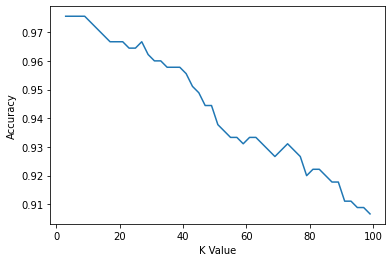

In [17]:
from matplotlib import pyplot as plt 
plt.plot(kVals, accuracies) 
plt.xlabel("K Value") 
plt.ylabel("Accuracy")